# Modelling

In this notebook we'll carry on from the EDA, and begin modelling. Before that, we'll deal with the outliers identified in the EDA, namely the sleep duration, heart rate and blood pressure level fields.

## Dealing With Outliers

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager, FontProperties
import seaborn as sns

In [4]:
sns.set()
path = "../../Oxygen_only/Oxygen-Light.ttf"
fontManager.addfont(path)

prop = FontProperties(fname=path)
sns.set(font=prop.get_name())

Firstly, we'll start by loading in the data, and selecting only the fields that were identified during the EDA:
- sleep_duration
- heart_rate
- blood_pressure_level
- sleep_disorder (target variable)

In [8]:
sleep_data = pd.read_csv("./processed_data.csv")
sleep_data = sleep_data[['sleep_duration', 'heart_rate', 'bp_level', 'sleep_disorder']]
sleep_data.head()

,sleep_duration,heart_rate,bp_level,sleep_disorder
0,6.1,77,Stage 1 High,None
1,6.2,75,Stage 1 High,None
2,6.2,75,Stage 1 High,None
3,5.9,85,Stage 2 High,Sleep Apnea
4,5.9,85,Stage 2 High,Sleep Apnea


To identify outliers, we'll plot boxplots of the numerical fields by sleep disorder.

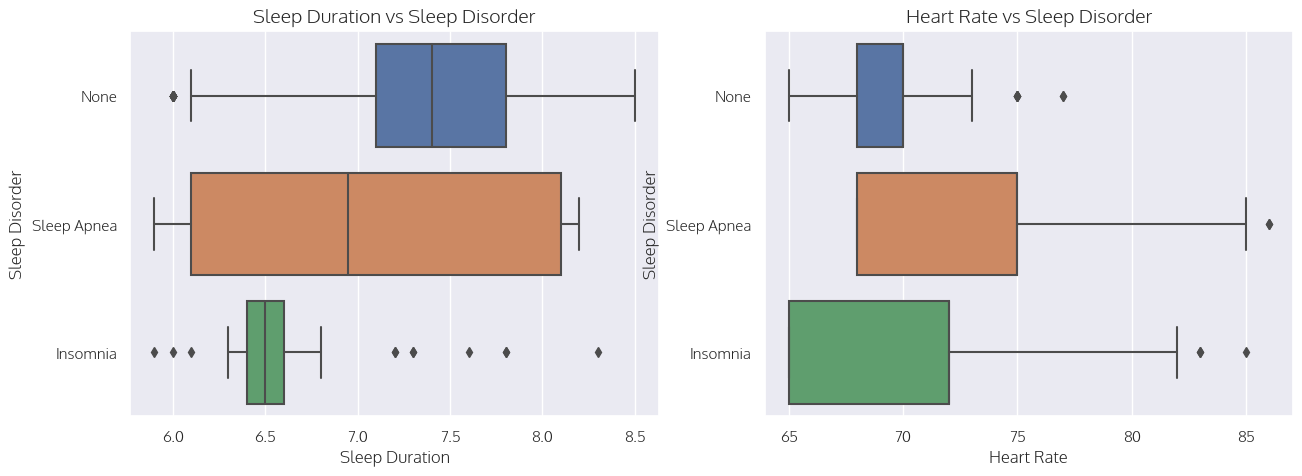

In [13]:
#2 axes side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

#plot boxplot between sleep duration and sleep disorder
#then plot boxplot between heart rate and sleep disorder

sns.boxplot(y='sleep_disorder', x='sleep_duration', data=sleep_data, ax=axes[0])
axes[0].set_title("Sleep Duration vs Sleep Disorder", fontsize=14)
axes[0].set_xlabel("Sleep Duration", fontsize=12)
axes[0].set_ylabel("Sleep Disorder", fontsize=12)

sns.boxplot(y='sleep_disorder', x='heart_rate', data=sleep_data, ax=axes[1])
axes[1].set_title("Heart Rate vs Sleep Disorder", fontsize=14)
axes[1].set_xlabel("Heart Rate", fontsize=12)
axes[1].set_ylabel("Sleep Disorder", fontsize=12)

plt.show()

As can be seen above, there are quite a lot of outliers in the sleep duration field, in particular, for those samples with 'Insomnia'. One solution to handle these is to clip the outliers to the values of the upper and lower whiskers. In general this can also be done for the heart rate field, which seems to have 5 outliers in total for all categories of the sleep disorder field.

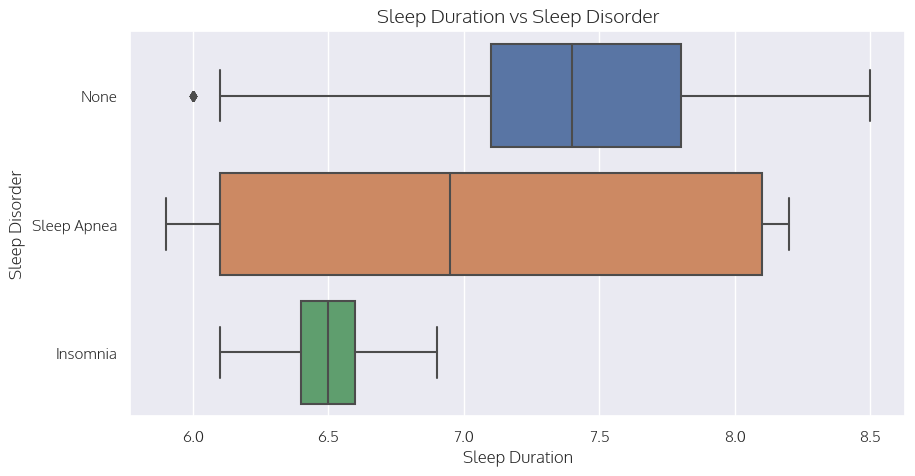

In [29]:
insomnia_samples = sleep_data[sleep_data['sleep_disorder'] == 'Insomnia']
lower_limit, upper_limit = np.percentile(insomnia_samples['sleep_duration'], [25, 75])
iqr = upper_limit - lower_limit
lower_bound = lower_limit - (1.5 * iqr)
upper_bound = upper_limit + (1.5 * iqr)
sleep_data_sleep_duration_clip = sleep_data.copy()
#clip sleep duration for samples with insomnia to these values using loc
insomnia_sleep_durations = sleep_data_sleep_duration_clip.loc[sleep_data_sleep_duration_clip['sleep_disorder'] == 'Insomnia', 'sleep_duration']
insomnia_sleep_durations = insomnia_sleep_durations.clip(lower_bound, upper_bound)
sleep_data_sleep_duration_clip.loc[sleep_data_sleep_duration_clip['sleep_disorder'] == 'Insomnia', 'sleep_duration'] = insomnia_sleep_durations

#plot boxplot between sleep duration and sleep disorder only
plt.figure(figsize=(10, 5))
sns.boxplot(y='sleep_disorder', x='sleep_duration', data=sleep_data_sleep_duration_clip)
plt.title("Sleep Duration vs Sleep Disorder", fontsize=14)
plt.xlabel("Sleep Duration", fontsize=12)
plt.ylabel("Sleep Disorder", fontsize=12)
plt.show()


The None sleep disorder also has one outlier, however, it's quite close to the lower whisker and so we'll leave it as is.

In [32]:
#function that calculates then removes outliers for a given sleep disorder, and a given numeric feature, similar to the above, also df gets passed in
def clip_outliers(df, sleep_disorder, feature):
    samples = df[df['sleep_disorder'] == sleep_disorder]
    lower_limit, upper_limit = np.percentile(samples[feature], [25, 75])
    iqr = upper_limit - lower_limit
    lower_bound = lower_limit - (1.5 * iqr)
    upper_bound = upper_limit + (1.5 * iqr)
    df_clip = df.copy()
    feature_values = df_clip.loc[df_clip['sleep_disorder'] == sleep_disorder, feature]
    feature_values = feature_values.clip(lower_bound, upper_bound)
    df_clip.loc[df_clip['sleep_disorder'] == sleep_disorder, feature] = feature_values
    return df_clip

#clip outliers for ['None', 'Insomnia', 'Sleep Apnea'] for heart duration, get composed dataframe
sleep_data_to_clip = sleep_data_sleep_duration_clip.copy()
for sleep_disorder in ['None', 'Insomnia', 'Sleep Apnea']:
    sleep_data_to_clip = clip_outliers(sleep_data_to_clip, sleep_disorder, 'heart_rate')

sleep_data_clipped = sleep_data_to_clip.copy()

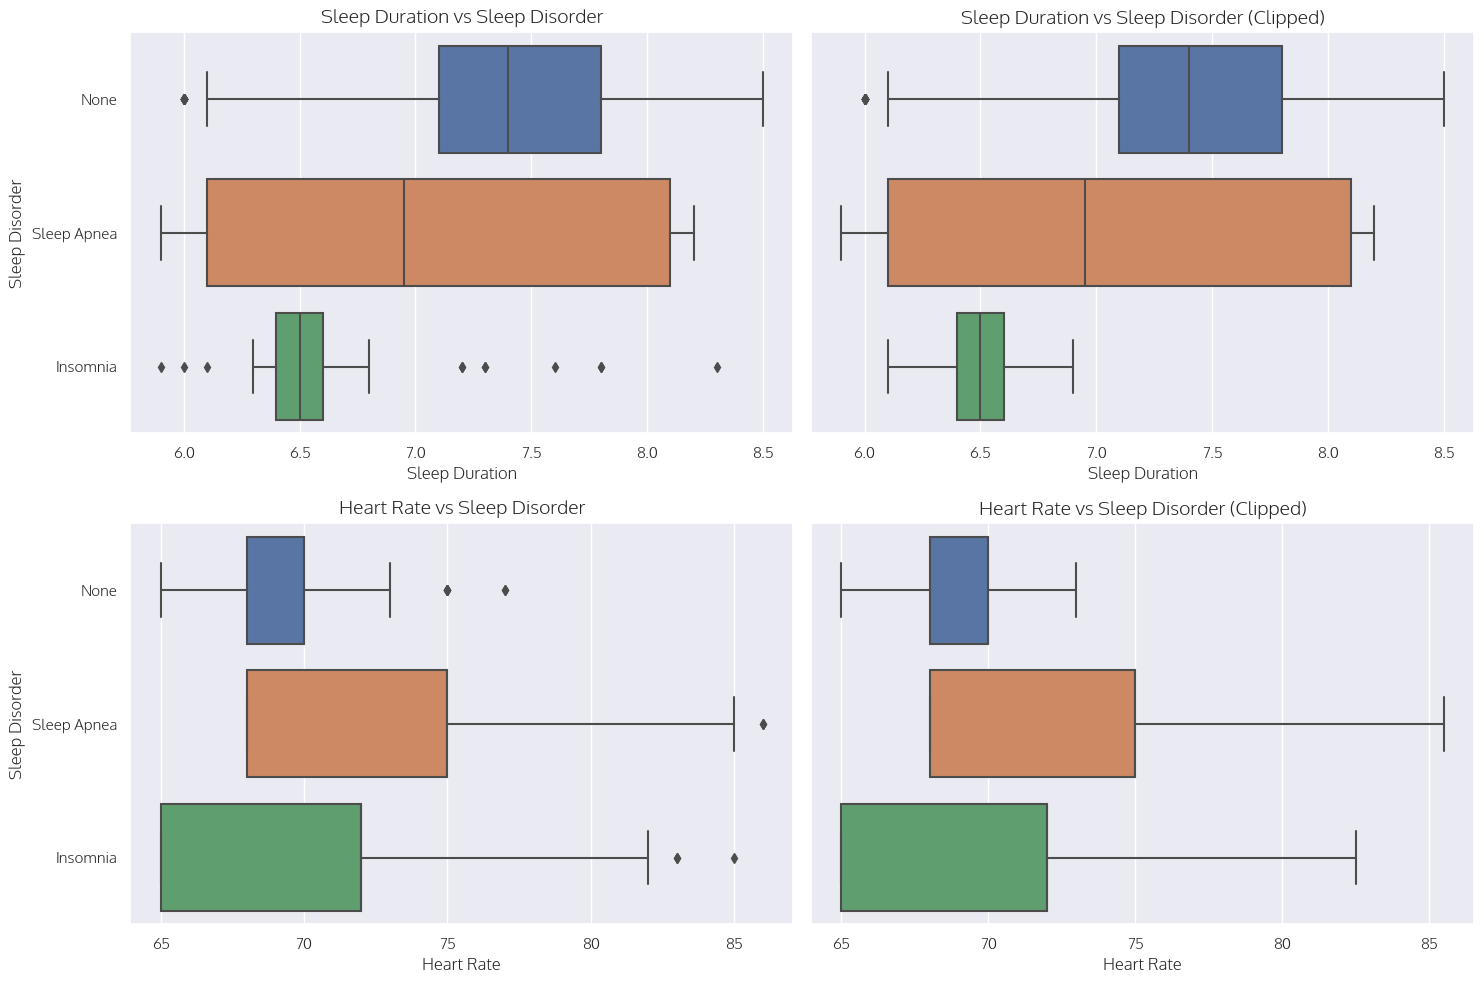

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

#on first column plot boxplot for unclipped data using sleep_data
#then using sleep_data_clipped plot box plot for corresponding feature
#share y axis for both columns
sns.boxplot(y='sleep_disorder', x='sleep_duration', data=sleep_data, ax=axes[0, 0])
axes[0, 0].set_title("Sleep Duration vs Sleep Disorder", fontsize=14)
axes[0, 0].set_xlabel("Sleep Duration", fontsize=12)
axes[0, 0].set_ylabel("Sleep Disorder", fontsize=12)

sns.boxplot(y='sleep_disorder', x='sleep_duration', data=sleep_data_clipped, ax=axes[0, 1])
axes[0, 1].set_title("Sleep Duration vs Sleep Disorder (Clipped)", fontsize=14)
axes[0, 1].set_xlabel("Sleep Duration", fontsize=12)
axes[0, 1].set_ylabel("", fontsize=12)

sns.boxplot(y='sleep_disorder', x='heart_rate', data=sleep_data, ax=axes[1, 0])
axes[1, 0].set_title("Heart Rate vs Sleep Disorder", fontsize=14)
axes[1, 0].set_xlabel("Heart Rate", fontsize=12)
axes[1, 0].set_ylabel("Sleep Disorder", fontsize=12)

sns.boxplot(y='sleep_disorder', x='heart_rate', data=sleep_data_clipped, ax=axes[1, 1])
axes[1, 1].set_title("Heart Rate vs Sleep Disorder (Clipped)", fontsize=14)
axes[1, 1].set_xlabel("Heart Rate", fontsize=12)
axes[1, 1].set_ylabel("", fontsize=12)
plt.tight_layout()
plt.show()
